<a href="https://colab.research.google.com/github/harrymkwn/TensorFlow/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#initialization

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import keras


print(tf.__version__)

1.15.0


#prepare Data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_img,train_labels) ,(test_img, test_labels) = fashion_mnist.load_data()

In [0]:
labels =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [81]:
print(train_img.shape,train_labels.shape,test_img.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
def img_show(i):
  plt.figure()
  plt.imshow(train_img[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [0]:
train_img = train_img  / 255.0
test_img = test_img / 255.0

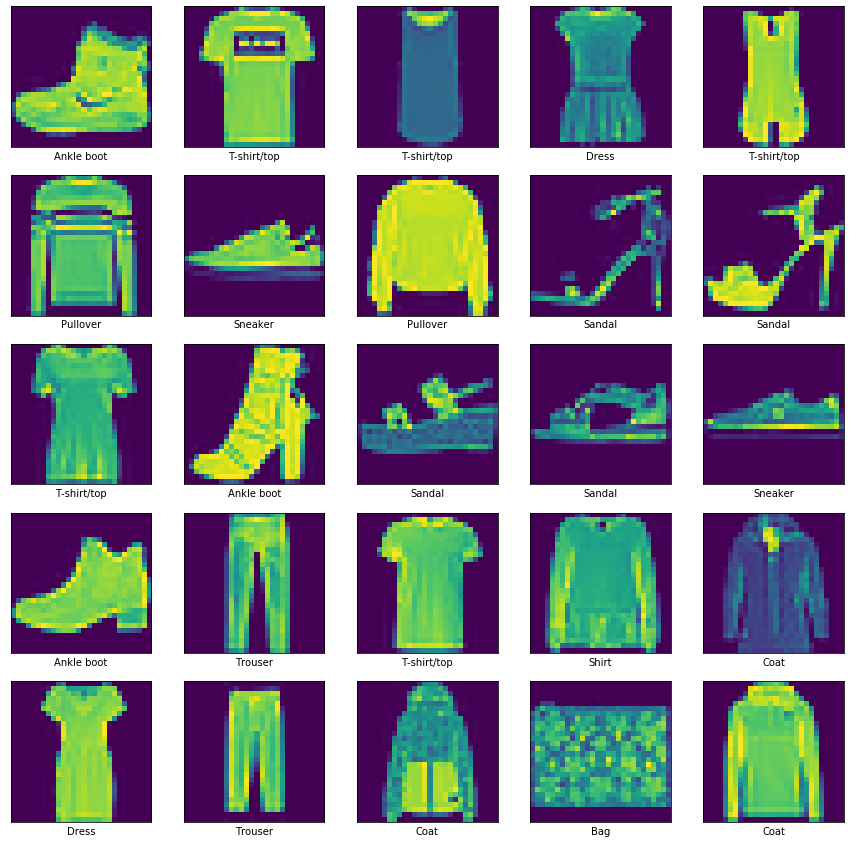

In [84]:
plt.figure(figsize=(15,15))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i])
  plt.xlabel(labels[train_labels[i]])
plt.show()

#Build the model

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [87]:
model.fit(train_img,train_labels,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5005 - acc: 0.8233
Epoch 2/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3725 - acc: 0.8660
Epoch 3/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3357 - acc: 0.8771
Epoch 4/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3114 - acc: 0.8860
Epoch 5/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2932 - acc: 0.8913
Epoch 6/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2817 - acc: 0.8956
Epoch 7/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2714 - acc: 0.8995
Epoch 8/15
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2590 - acc: 0.9037
Epoch 9/15
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2487 - acc: 0.9075
Epoch 10/15
60000/60000 [==============================] - 

In [88]:
test_loss , test_acc = model.evaluate(test_img,test_labels,verbose=2)

10000/10000 - 0s - loss: 0.3369 - acc: 0.8878


In [89]:
print(test_acc)

0.8878


In [0]:
pred = model.predict(test_img)

In [91]:
print(pred)

[[1.6170542e-13 2.5664436e-11 9.3707368e-11 ... 1.9458025e-03
  2.1490771e-11 9.9800581e-01]
 [9.8018827e-06 7.2699281e-19 9.9977010e-01 ... 2.0411607e-16
  1.5403090e-11 3.3052805e-15]
 [1.6011534e-11 1.0000000e+00 2.0484719e-12 ... 1.8914510e-23
  3.9366700e-14 7.2900555e-23]
 ...
 [1.3873121e-06 5.5372386e-15 9.8771009e-09 ... 4.5246935e-11
  9.9999762e-01 1.2016217e-14]
 [1.5889295e-11 1.0000000e+00 1.7684937e-10 ... 3.9836426e-11
  1.0666984e-10 1.1465621e-12]
 [1.9835952e-05 7.1151613e-09 2.2402692e-05 ... 1.1582995e-03
  1.8330087e-04 8.0024853e-07]]


In [92]:
print(pred[0].argmax())

9


In [0]:
def plt_img(i,predictions_array,true_label,img):
  pred , true_label , img  = predictions_array, true_label[i] , img[i] 
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  pred_label = np.argmax(pred)
  if pred_label == true_label:
    color = 'blue'
  else :
    color = 'red'
  # plt.xlabel("{} {:.2f} ({})".format(labels[pred_label],100*np.max(pred),labels[true_label],color=color))

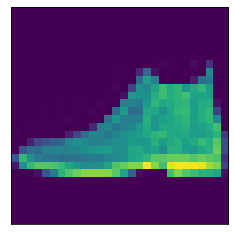

In [94]:
plt_img(0,pred,test_labels,test_img)

In [0]:
def plt_val(i,prediction_array,true_label):
  pred , true_label = prediction_array[i], true_label[i] 
  plt.grid(False)
  plt.xticks(range(9))
  plt.yticks([])
  thisplot = plt.bar(range(10),pred,color='#777777')
  plt.ylim([0,1])
  pred_label = np.argmax(pred)
  thisplot[pred_label].set_color('red')

  thisplot[true_label].set_color('blue')

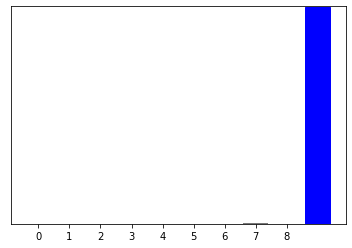

In [96]:
plt_val(0,pred,test_labels)

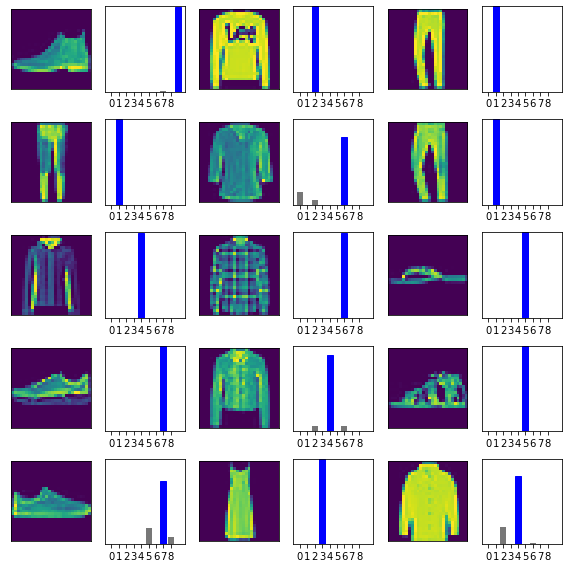

In [97]:
rows = 5
cols = 3
tot = rows * cols
plt.figure(figsize=(8,8))
for i in range(tot):
  plt.subplot(rows,2*cols,2*i + 1)
  plt_img(i,pred,test_labels,test_img)
  plt.subplot(rows,2*cols,2*i + 2)
  plt_val(i,pred,test_labels)
plt.tight_layout()
plt.show()